# Generating Bar Graph for Average Test Case Scores

### Generate Testing Data
We start by generating a list of $t$ tests, each with a maximum $m$ in the range $1 \leq m \leq max_score$
We use this set of $t$ test cases with maximums $m_1, m_2, ..., m_t$ to generate a data set of $n$ samples, each containing $t$ scores $s_1, s_2, ..., s_t$ , where $1 \leq s_i \leq m_i$

In [119]:
import numpy as np

In [150]:
def generate_data(n, t, max_score):
    test_case_max_scores = np.random.randint(max_score+1, size=(t))
    data = np.zeros((n,t))
    for i in range(n):
        for j in range(t):
            data[i][j] = np.random.randint(test_case_max_scores[j]+1)
    return data, test_case_max_scores

Next, we print the test data. We can see that each column of values falls within the correct range given by the max scores

In [151]:
test_n = 20
test_t = 5
test_max_score = 25

data, max_scores = generate_data(test_n, test_t, test_max_score)
print("Max Scores: \n {}".format(max_scores))
print("Values: \n {}".format(data))

Max Scores: 
 [22 23  8  7 11]
Values: 
 [[ 7. 20.  4.  3.  5.]
 [11. 17.  8.  3. 10.]
 [14. 12.  8.  7.  1.]
 [12. 15.  7.  0.  7.]
 [19.  5.  5.  3.  9.]
 [20. 13.  1.  1.  0.]
 [22.  3.  6.  3.  5.]
 [ 9. 16.  1.  0. 11.]
 [21.  3.  2.  6.  7.]
 [15. 12.  4.  3.  2.]
 [13. 12.  6.  5.  2.]
 [ 2.  8.  0.  7.  8.]
 [14. 14.  8.  5.  6.]
 [ 2. 10.  2.  0.  6.]
 [ 3. 12.  1.  6.  4.]
 [14. 17.  5.  4.  9.]
 [15. 19.  3.  0.  5.]
 [22. 19.  1.  6.  7.]
 [21.  0.  7.  1. 10.]
 [ 1. 15.  3.  4.  9.]]


Now we rearrange the data into a format that can be graphed in a bar graph
This function generates $t$ buckets, one for each test case, where each bucket contains the average of the $n$ sample scores for that test

In [159]:
test_scores = [0]*test_t
for entry in data:
    for i,score in enumerate(entry):
        test_scores[i] += score / test_n

print(test_scores)

[12.85, 12.099999999999998, 4.1, 3.3499999999999996, 6.1499999999999995]


### Graphing
Finally, we graph the data in a format similar to that which will be used in the frontend UI. Each bar displays a gray bar denoting the maximum value for that test case, as well as a colored bar dentoing the average score for that test case.

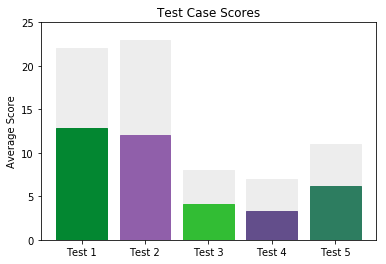

In [172]:
import matplotlib.pyplot as plt
import random
import math

def random_hex_color():
    values = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
    hex = "#"
    for i in range(6):
        index = random.randint(0,15)
        hex += values[index]
    return hex

fig, ax = plt.subplots()
max_bars = plt.bar(np.arange(1, test_t+1), max_scores)
for bar in max_bars:
    bar.set_color("#ededed")
bars = plt.bar(np.arange(1,test_t+1), test_scores)
for bar in bars:
    bar.set_color(random_hex_color())
ax.set_xticks(np.arange(1,len(bars)+1))
ax.set_xticklabels(["Test {}".format(i+1) for i in range(len(bars))])
y_max = math.ceil(max(max_scores) / 5) * 5
ax.set_ylim([0, y_max])
ax.set_ylabel('Average Score')
ax.set_title('Test Case Scores')
save_fig = plt.gcf()    # Used later for saving the figure
plt.show(block=False)


It would be cool if we could display these graphs on a testing page, to help the frontend team know if they are displaying the data correctly. To do that, we can save these images as png files, and host them on the web server. Ideally, the graph corresponding to the *most recent* data will always be on display.

In [177]:
import subprocess
import shlex
fname='img/test2.png'
save_fig.savefig(fname)

Now we display the saved graph:
![title](img/test.png)